In [208]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, ifft
from scipy import fftpack
from scipy import signal
import soundfile as sf

In [168]:
cov_file = "cov1.wav"

In [169]:
ipd.Audio(cov_file)

In [170]:
# load audio files with librosa
scale, sr = librosa.load(cov_file)

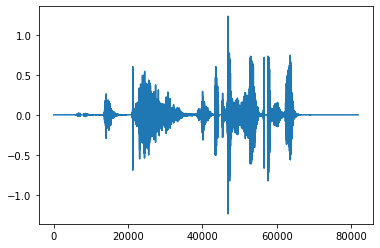

In [171]:
plt.plot(scale)

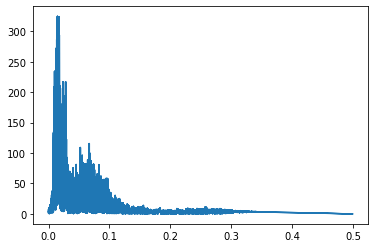

In [172]:
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(scale)
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives
frequences = fftpack.fftfreq(scale.size)
plt.plot(np.abs(frequences), power)


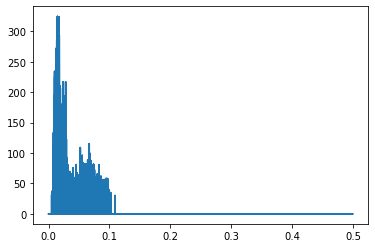

In [173]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[ power < np.percentile(power,90) ] = 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [174]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

/Users/baudouin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


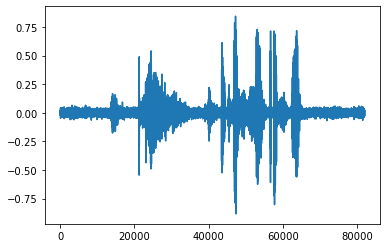

In [175]:
plt.plot(filtered_signal)

/Users/baudouin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


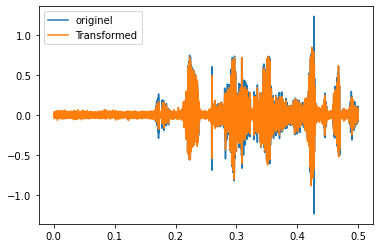

In [176]:
# Visualisation des résultats
plt.plot(np.abs(frequences), scale, label='Originel')
plt.plot(np.abs(frequences), filtered_signal, label='Transformed')
plt.legend()
plt.show()

In [177]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [178]:
type(scale[0])

numpy.float32

In [179]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [180]:
S_scale.shape

(1025, 161)

In [181]:
type(S_scale[0][0])

numpy.complex64

In [182]:
Y_scale = np.abs(S_scale) ** 2

In [183]:
Y_scale.shape

(1025, 161)

In [184]:
type(Y_scale[0][0])

numpy.float32

In [185]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

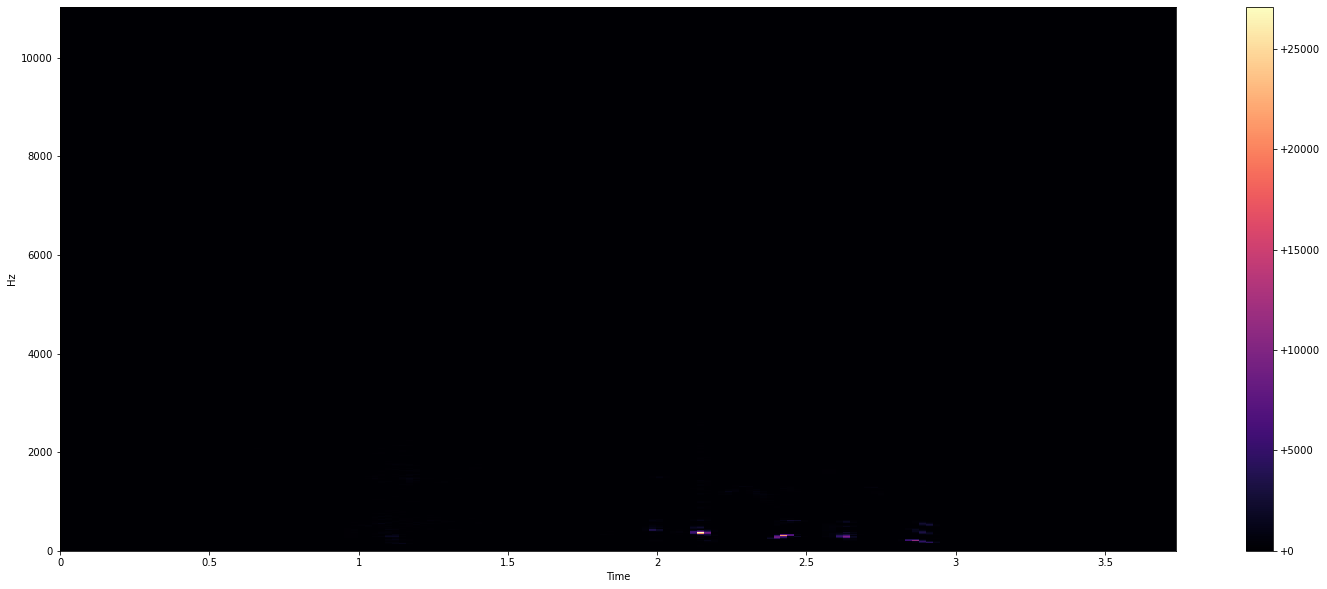

In [186]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)

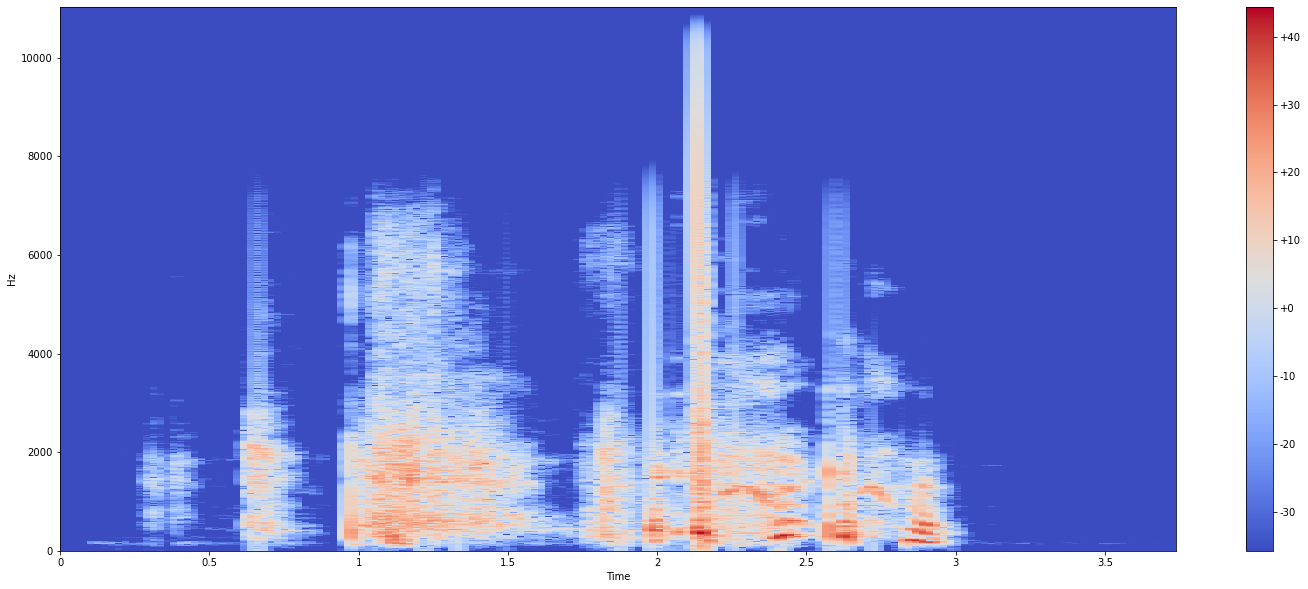

In [187]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

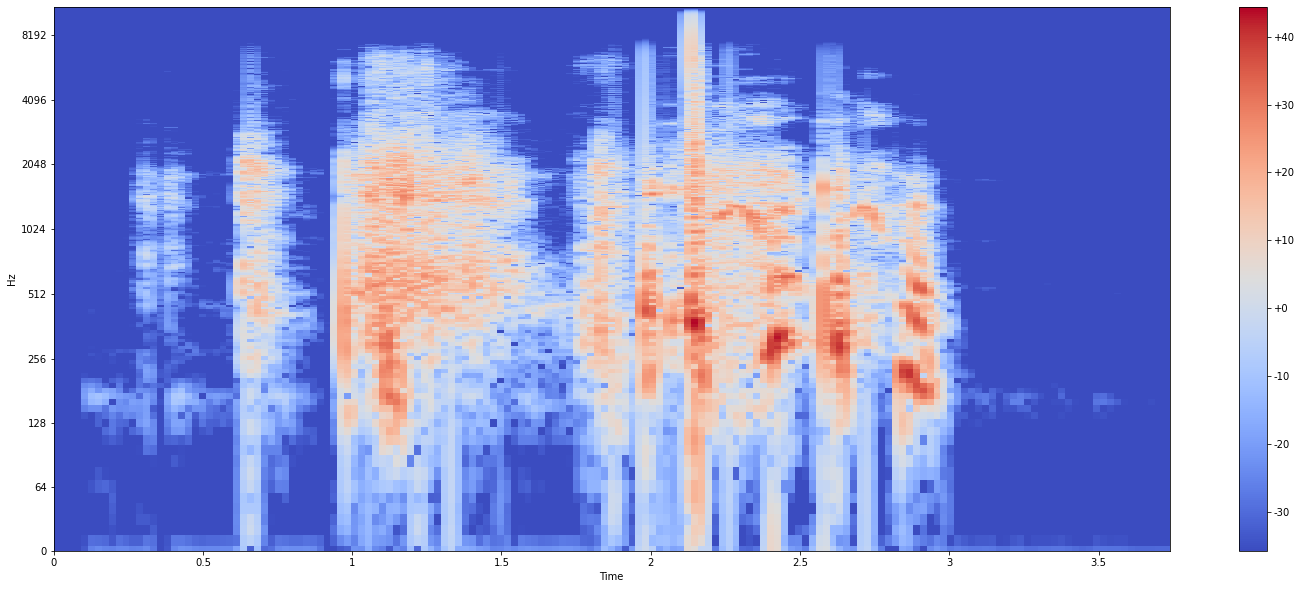

In [188]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [189]:
type(scale[0])

numpy.float32

In [190]:
type(np.abs(filtered_signal[0]))

numpy.float32

In [191]:
type(filtered_signal[0])

numpy.complex64

In [192]:
S_scale = librosa.stft(np.abs(filtered_signal), n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

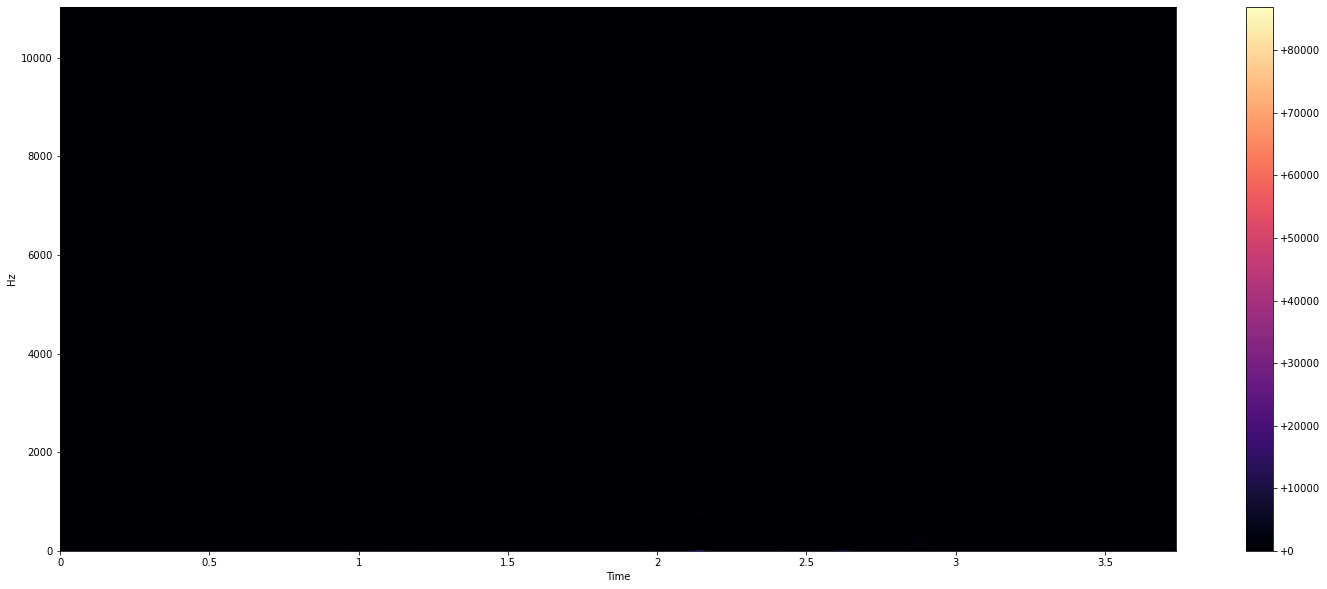

In [193]:
Y_scale = np.abs(S_scale) ** 2
plot_spectrogram(Y_scale, sr, HOP_SIZE)

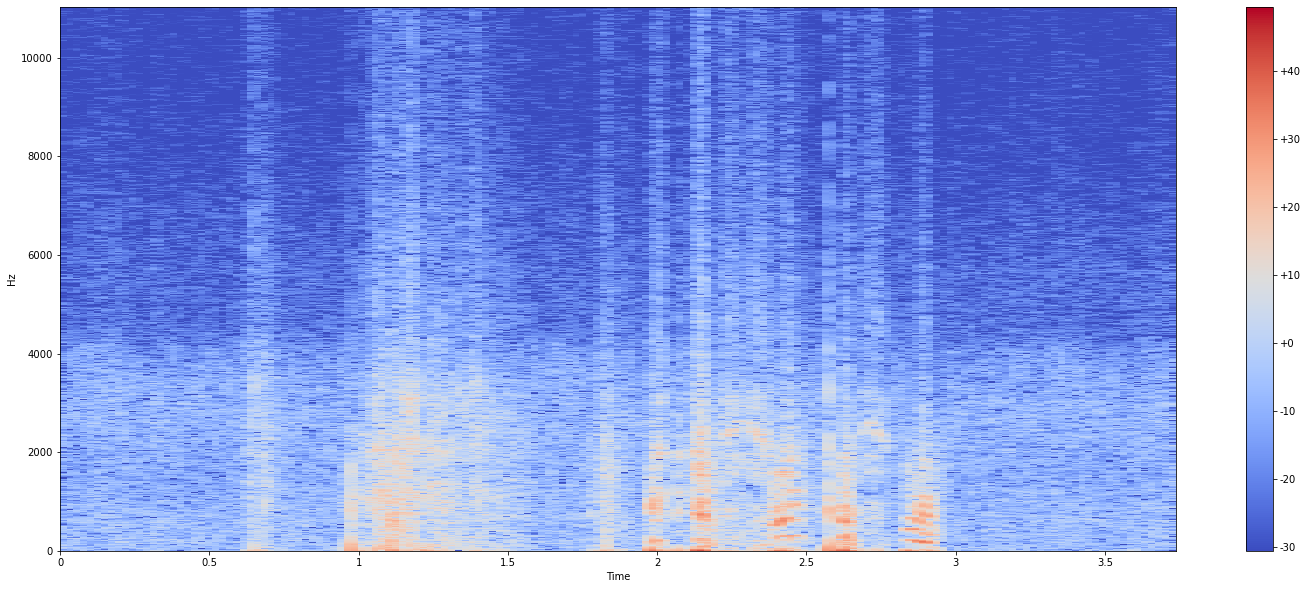

In [194]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)

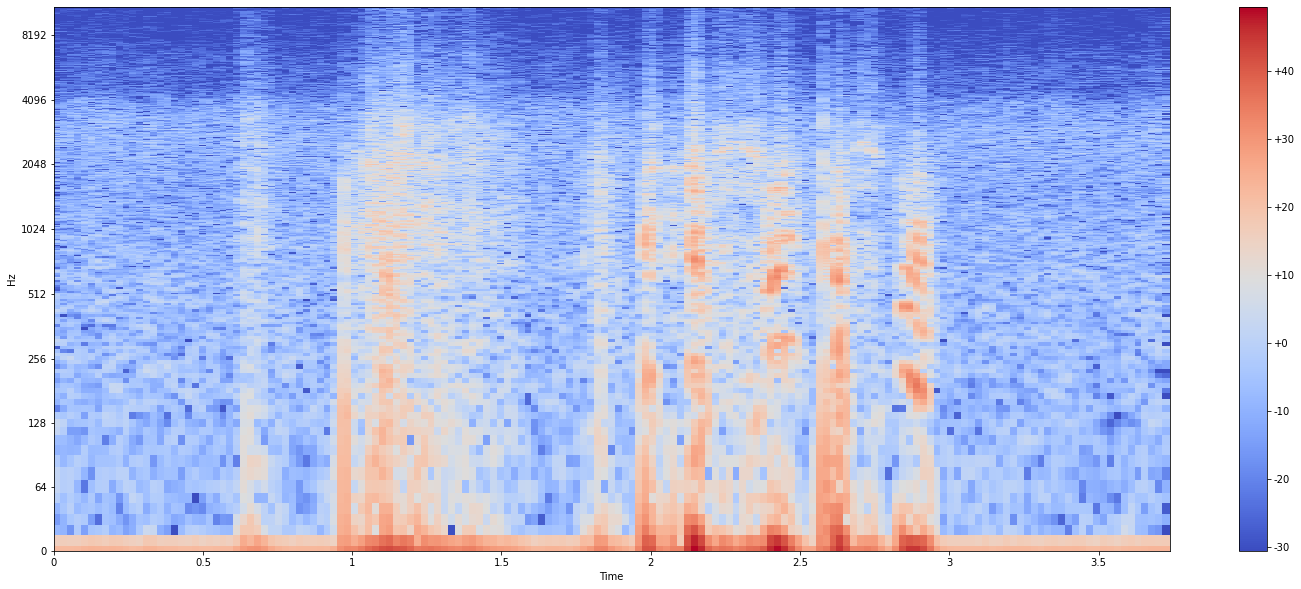

In [195]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")

In [213]:
sf.write("example.wav", np.abs(filtered_signal),sr,'PCM_24')
ipd.Audio("example.wav")

In [203]:
type(filtered_signal[0])

numpy.complex64